In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter05/winedata.csv')

In [3]:
df.head()

,Quality,Alcohol,Malic Acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df.tail()

,Quality,Alcohol,Malic Acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Quality               177 non-null    int64  
 1   Alcohol               177 non-null    float64
 2   Malic Acid            177 non-null    float64
 3   Ash                   177 non-null    float64
 4   Alcalinity            177 non-null    float64
 5   Magnesium             177 non-null    int64  
 6   Total phenols         177 non-null    float64
 7   Flavanoids            177 non-null    float64
 8   Nonflavanoid phenols  177 non-null    float64
 9   Proanthocyanins       177 non-null    float64
 10  Color intensity       177 non-null    float64
 11  Hue                   177 non-null    float64
 12  OD280                 177 non-null    float64
 13  Proline               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


no missing values

In [6]:
df.describe()

,Quality,Alcohol,Malic Acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Data Preparation

In [7]:
X = df.drop(['Quality'], axis=1).values
y = df['Quality'].values

In [10]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (177, 13)
y shape: (177,)


Train / Test Split Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (132, 13)
y_train shape: (132,)

X_test shape: (45, 13)
y_test shape: (45,)


Standardize data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Train

In [15]:
from sklearn.ensemble import BaggingClassifier # Classification problem
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
dt = DecisionTreeClassifier(criterion='entropy')
param_values = {'n_estimators': [10, 20, 25, 30], 'base_estimator__max_leaf_nodes':[5, 10, 15, 20], 'base_estimator__max_depth':[3, 4, 5]}

In [17]:
bg = BaggingClassifier(base_estimator=dt, oob_score=True, bootstrap=True, random_state=1)

Find Best Param in model

In [18]:
model = GridSearchCV(bg, param_values, cv=20, n_jobs=-1)

In [19]:
model.fit(X_train, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='entropy',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                     

In [22]:
print(f'best params: {model.best_params_}')

best params: {'base_estimator__max_depth': 3, 'base_estimator__max_leaf_nodes': 10, 'n_estimators': 25}


Re train model using best params

In [23]:
best_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, max_depth=3)
best_bg = BaggingClassifier(base_estimator=best_dt, oob_score=True, bootstrap=True, random_state=1, n_estimators=25)

In [24]:
best_bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=10,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

### Model Evaluation

In [25]:
y_pred = best_bg.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

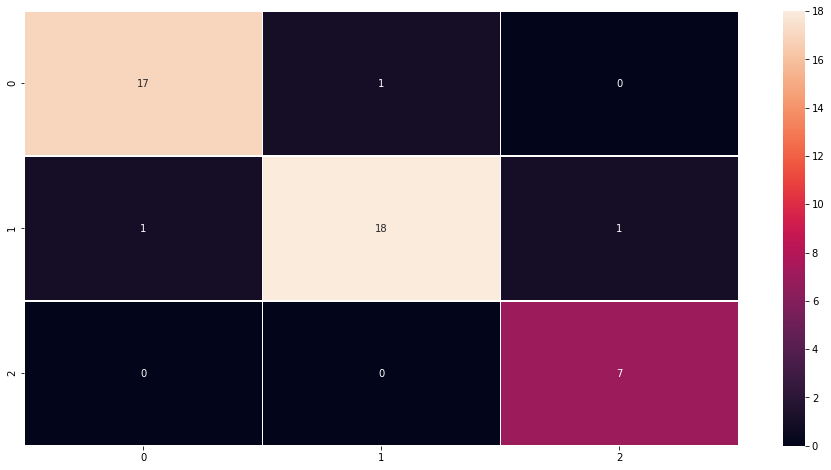

In [27]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5)
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.95      0.90      0.92        20
           3       0.88      1.00      0.93         7

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.93      0.93      0.93        45

